# French electric power consumption

The idea is to make an advanced version of the "Dessous des cartes" TV show in tribute to Jean Christophe Victor.

## Libraries

In [16]:
%run "../config/notebook.ipynb"
%run "../config/files.ipynb"
%run "../eda/eda_electric_power_consumption.ipynb"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd

%matplotlib inline

ERROR:root:File `'../config/notebook.ipynb.py'` not found.
ERROR:root:File `'../config/files.ipynb.py'` not found.
ERROR:root:File `'../eda/eda_electric_power_consumption.ipynb.py'` not found.


## Maps

### Metropolitan France base map

#### Build the dataframe

In [3]:
france = gpd.read_file(FRANCE_DEPARTMENTS_BASEMAP_FILE_PATH)

# filter to remove the overseas departments
not_france_overseas = (france.code_insee != "971") & (france.code_insee != "972") & (france.code_insee != "973") \
& (france.code_insee != "974") & (france.code_insee != "975") & (france.code_insee != "976") & (france.code_insee != "977") \
& (france.code_insee != "978") & (france.code_insee != "984") & (france.code_insee != "986") & (france.code_insee != "987") \
& (france.code_insee != "988") & (france.code_insee != "989")

# apply the filter to remove the overseas departments
france_metropolitan = france[not_france_overseas] 
# add a column to the map
france_metropolitan = france_metropolitan.set_index('code_insee')

#### Display the France metropolitan base map

(-5.87634295520445, 10.295119456019371, 40.84540100670953, 51.5767811046909)

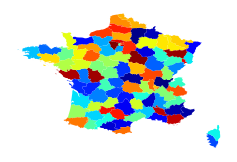

In [4]:
ax = france_metropolitan.plot(figsize=(4,4),column='nom', cmap='jet')
# Turns off-grid on the left Axis.
ax.grid(False)
ax.axis('off')

### Merge the base maps with consumption statistics

In [ ]:
def merge_year(year):
    """ Merge the base map and the stats on the given year """
    df = df_total_consumptions[df_total_consumptions['year'] == year]        
    df_result = france_metropolitan.join(df, left_on='code_insee', right_on='code_insee')
    
    return df_result.set_index('code_insee')

In [ ]:
test_df = merge_year(2011)
test_df.head()

ValueError: zero-size array to reduction operation minimum which has no identity

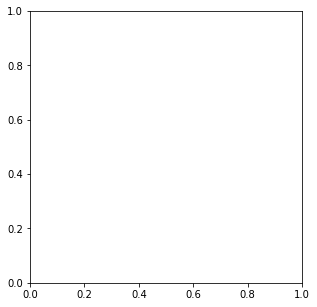

In [23]:
test_df = merge_year(2011)
fig, axs = plt.subplots(1,1, figsize=(10, 5))

test_df.plot(ax=axs, column='total_residential', cmap='RdPu')


ValueError: zero-size array to reduction operation minimum which has no identity

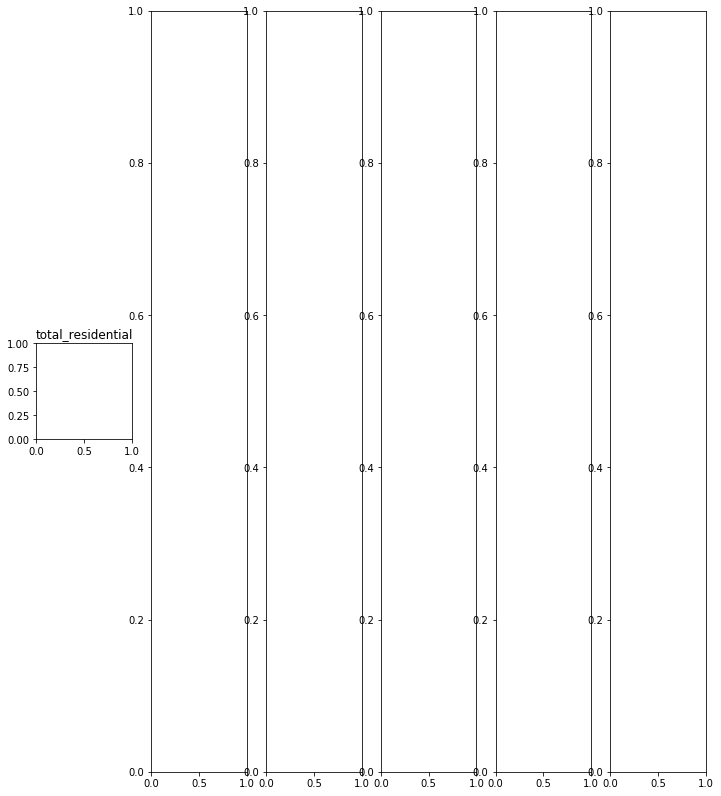

In [18]:


def display_total_row(year):
    # get all differents totals
    columns = [column for column in list(df_total_consumptions.columns) if column.startswith('total')]
    
    fig, axs = plt.subplots(1, len(columns), figsize=(len(columns)*2, len(years)*2))
    
    geodf = merge_year(year)
        
    for column_index in range(len(columns)):
        axs[column_index].set_title(columns[column_index])
        geodf.plot(ax=axs[column_index], column=columns[column_index], cmap='RdPu')
        axs[column_index].grid(False)
        axs[column_index].axis('off')
            
def display_total_rows():
    # get all differents totals
    columns = [column for column in list(df_total_consumptions.columns) if column.startswith('total')]
    
    # get distinc years
    years = df_total_consumptions['year'].unique()
    
    # build the figure
    fig, axs = plt.subplots(len(years), len(columns), figsize=(len(columns)*2, len(years)*2))
    
    # plot each row
    for year_index in range(len(years)):
        geodf = merge_year(years[year_index])
        
        for column_index in range(len(columns)):
            axs[year_index, column_index].set_title(columns[column_index])
            geodf.plot(ax=axs[year_index, column_index], column=columns[column_index], cmap='RdPu')
            axs[year_index, column_index].grid(False)
            axs[year_index, column_index].axis('off')
            
display_total_row(2011)

### Metropolitan France total electric consumption map

## Augment the map with the conso by dep

In [45]:
# add a column to the map
france_metropolitan = france_metropolitan.set_index('code_insee')

In [46]:
# join with conso by department
france_metropolitan_conso = france_metropolitan.join(df_conso_by_dep)
# patch 69D and 69M
france_metropolitan_conso.loc['69D', 'conso'] = df_conso_by_dep.loc['69','conso']
france_metropolitan_conso.loc['69M', 'conso'] = df_conso_by_dep.loc['69','conso']
# remove the index
france_metropolitan_conso = france_metropolitan_conso.reset_index()

In [47]:
france_metropolitan_conso.head()

,code_insee,nom,nuts3,wikipedia,surf_km2,geometry,conso
0,11,Aude,FR811,fr:Aude (département),6343.0,"POLYGON ((1.68872 43.27368, 1.69001 43.27423, ...",1.525766e+07
1,43,Haute-Loire,FR723,fr:Haute-Loire,5003.0,"POLYGON ((3.08206 45.28988, 3.08209 45.29031, ...",1.110027e+07
2,13,Bouches-du-Rhône,FR823,fr:Bouches-du-Rhône,5247.0,"MULTIPOLYGON (((4.23014 43.46047, 4.23025 43.4...",1.112262e+08
3,47,Lot-et-Garonne,FR614,fr:Lot-et-Garonne,5385.0,"POLYGON ((-0.14058 44.22648, -0.12931 44.23218...",1.466622e+07
4,23,Creuse,FR632,fr:Creuse (département),5599.0,"POLYGON ((1.37254 46.21672, 1.37257 46.21677, ...",4.446839e+06


### Display France departments electric power consumption 

(-5.87634295520445, 10.295119456019371, 40.84540100670953, 51.5767811046909)

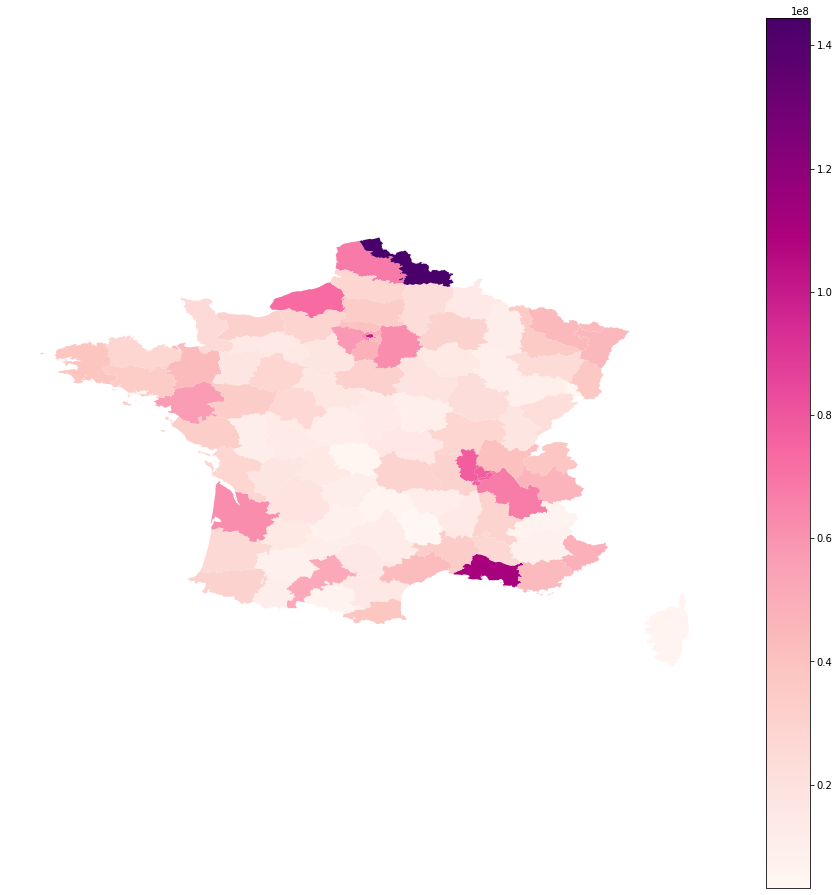

In [48]:
ax = france_metropolitan_conso.plot(figsize=(16,16),column='conso', cmap='RdPu', legend=True)
# Turns off-grid on the left Axis.
ax.grid(False)
ax.axis('off')

## Electric power consumption by department resident  

#### Electric consumption by department for residential purpose 

In [49]:
sr_residential_electric_conso_by_dep = df_conso[electricity_only].loc[:, ['Code Département', 'Consommation Résidentiel  (MWh)']].groupby('Code Département').sum().sort_values(by='Consommation Résidentiel  (MWh)'
,ascending=False) 

sr_residential_electric_conso_by_dep.reset_index()
# create a DataFrame from the Series
df_residential_electric_conso_by_dep = pd.DataFrame(sr_residential_electric_conso_by_dep)
# Remove the index
df_residential_electric_conso_by_dep = df_residential_electric_conso_by_dep.reset_index()
# Rename the columns
df_residential_electric_conso_by_dep.columns = ['code_insee', 'conso']
# Set the index on the code_insee column
df_residential_electric_conso_by_dep = df_residential_electric_conso_by_dep.set_index('code_insee')

####  Geomap of electric consumption by department for residential purpose

In [50]:
# join with conso by department
france_metropolitan_conso_resident = france_metropolitan.join(df_residential_electric_conso_by_dep)
# patch 69D and 69M
france_metropolitan_conso_resident.loc['69D', 'conso'] = df_residential_electric_conso_by_dep.loc['69','conso']
france_metropolitan_conso_resident.loc['69M', 'conso'] = df_residential_electric_conso_by_dep.loc['69','conso']
# remove the index
france_metropolitan_conso_resident = france_metropolitan_conso_resident.reset_index()

#### Display the Geomap 

(-5.87634295520445, 10.295119456019371, 40.84540100670953, 51.5767811046909)

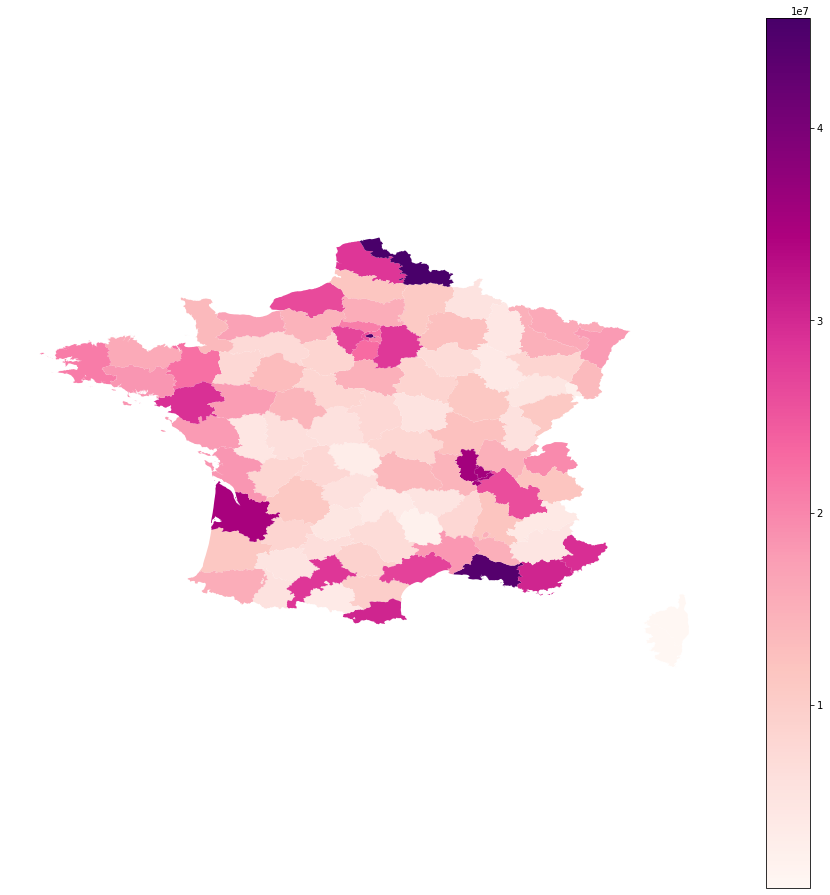

In [51]:
ax = france_metropolitan_conso_resident.plot(figsize=(16,16),column='conso', cmap='RdPu', legend=True)
# Turns off-grid on the left Axis.
ax.grid(False)
ax.axis('off')

## Tertiary electric power consumption by department   

#### Electric consumption by department for tertiary purpose 

In [52]:
sr_tertiary_electric_conso_by_dep = df_conso[electricity_only].loc[:, ['Code Département', 'Consommation Tertiaire  (MWh)']].groupby('Code Département').sum().sort_values(by='Consommation Tertiaire  (MWh)'
,ascending=False) 

sr_tertiary_electric_conso_by_dep.reset_index()
# create a DataFrame from the Series
df_tertiary_electric_conso_by_dep = pd.DataFrame(sr_tertiary_electric_conso_by_dep)
# Remove the index
df_tertiary_electric_conso_by_dep = df_tertiary_electric_conso_by_dep.reset_index()
# Rename the columns
df_tertiary_electric_conso_by_dep.columns = ['code_insee', 'conso']
# Set the index on the code_insee column
df_tertiary_electric_conso_by_dep = df_tertiary_electric_conso_by_dep.set_index('code_insee')

#### Build the Geomap

In [53]:
# join with conso by department
france_metropolitan_conso_tertiary = france_metropolitan.join(df_tertiary_electric_conso_by_dep)
# patch 69D and 69M
france_metropolitan_conso_tertiary.loc['69D', 'conso'] = df_tertiary_electric_conso_by_dep.loc['69','conso']
france_metropolitan_conso_tertiary.loc['69M', 'conso'] = df_tertiary_electric_conso_by_dep.loc['69','conso']
# remove the index
france_metropolitan_conso_tertiary = france_metropolitan_conso_tertiary.reset_index()

#### Display the Geomap

(-5.87634295520445, 10.295119456019371, 40.84540100670953, 51.5767811046909)

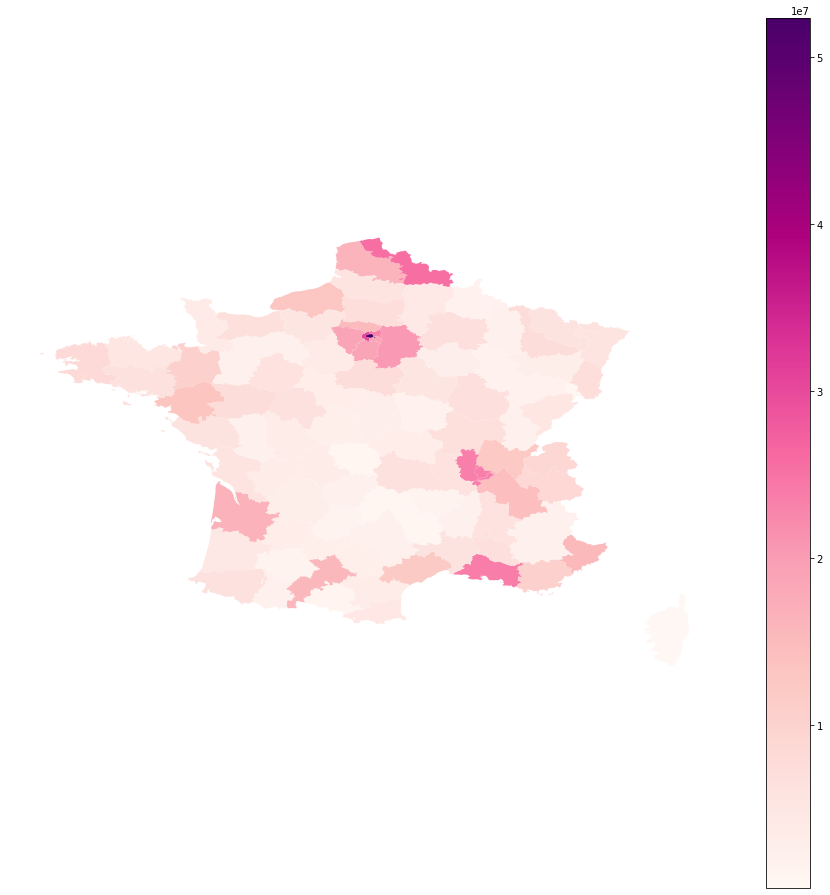

In [54]:
ax = france_metropolitan_conso_tertiary.plot(figsize=(16,16),column='conso', cmap='RdPu', legend=True)
# Turns off-grid on the left Axis.
ax.grid(False)
ax.axis('off')

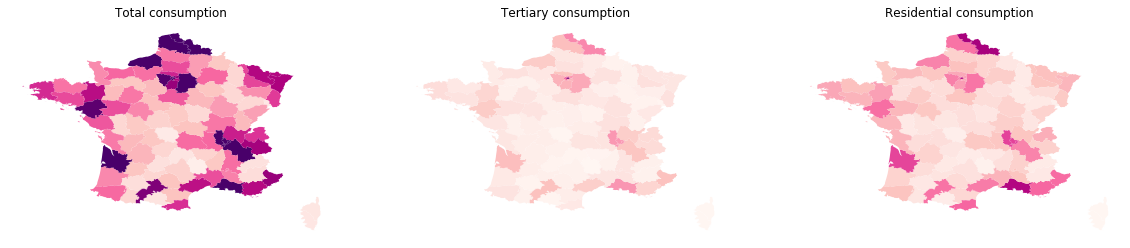

## Industrial electric power consumption by department   

#### Electric consumption by department for industrial purpose 

In [60]:
sr_industrial_electric_conso_by_dep = df_conso[electricity_only].loc[:, ['Code Département', 'Consommation Industrie (MWh)']].groupby('Code Département').sum().sort_values(by='Consommation Industrie (MWh)'
,ascending=False) 

sr_industrial_electric_conso_by_dep.reset_index()
# create a DataFrame from the Series
df_industrial_electric_conso_by_dep = pd.DataFrame(sr_industrial_electric_conso_by_dep)
# Remove the index
df_industrial_electric_conso_by_dep = df_industrial_electric_conso_by_dep.reset_index()
# Rename the columns
df_industrial_electric_conso_by_dep.columns = ['code_insee', 'conso']
# Set the index on the code_insee column
df_industrial_electric_conso_by_dep = df_industrial_electric_conso_by_dep.set_index('code_insee')fig, axs = plt.subplots(1, 3, figsize=(20, 10))

axs[0].set_title('Total consumption')
france_metropolitan_conso.plot(ax=axs[0], column='conso', cmap='RdPu', legend=False, vmin=0, vmax=6e7)

axs[1].set_title('Tertiary consumption')
france_metropolitan_conso_tertiary.plot(ax=axs[1], column='conso', cmap='RdPu', legend=False, vmin=0, vmax=6e7)

axs[2].set_title('Residential consumption')
france_metropolitan_conso_resident.plot(ax=axs[2], column='conso', cmap='RdPu', legend=False, vmin=0, vmax=6e7)

# Turns off-grid on the left Axis.
for ax in axs:
    ax.grid(False)
    ax.axis('off')

#### Build the Geomap

In [61]:
# join with conso by department
france_metropolitan_conso_industrial = france_metropolitan.join(df_industrial_electric_conso_by_dep)
# patch 69D and 69M
france_metropolitan_conso_industrial.loc['69D', 'conso'] = df_industrial_electric_conso_by_dep.loc['69','conso']
france_metropolitan_conso_industrial.loc['69M', 'conso'] = df_industrial_electric_conso_by_dep.loc['69','conso']
# remove the index
france_metropolitan_conso_industrial = france_metropolitan_conso_industrial.reset_index()

#### Display the Geomap

(-5.87634295520445, 10.295119456019371, 40.84540100670953, 51.5767811046909)

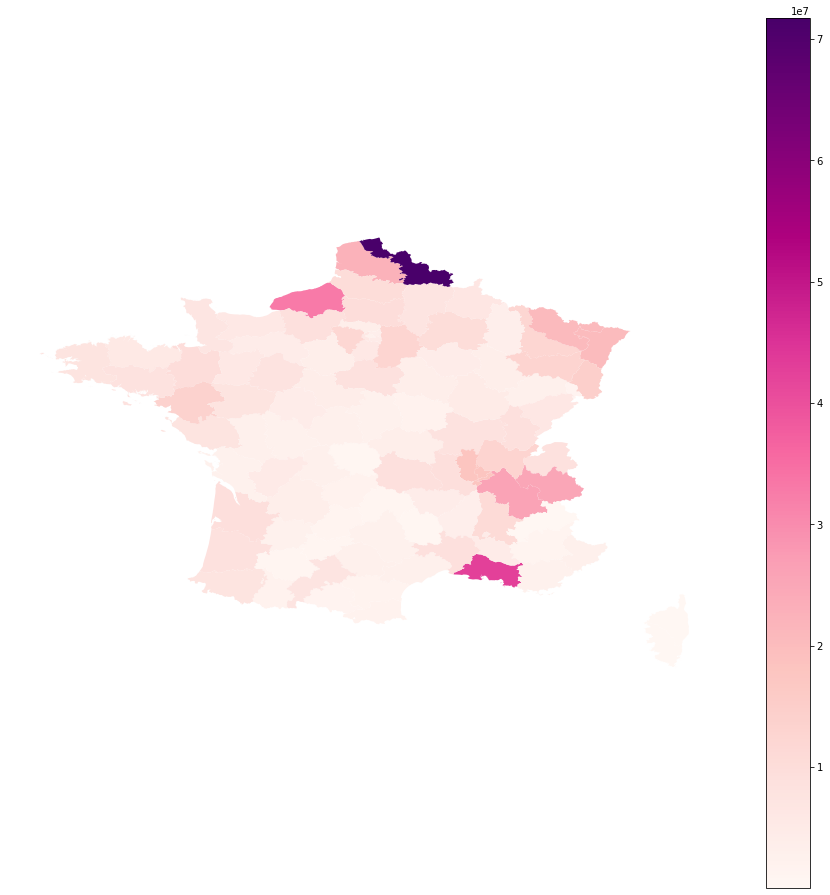

In [62]:
ax = france_metropolitan_conso_industrial.plot(figsize=(16,16),column='conso', cmap='RdPu', legend=True)
# Turns off-grid on the left Axis.
ax.grid(False)
ax.axis('off')

## Bringing all together

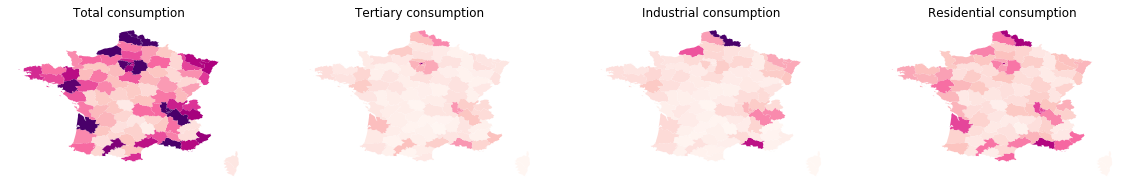

In [65]:
fig, axs = plt.subplots(1, 4, figsize=(20, 10))

axs[0].set_title('Total consumption')
france_metropolitan_conso.plot(ax=axs[0], column='conso', cmap='RdPu', legend=False, vmin=0, vmax=6e7)

axs[1].set_title('Tertiary consumption')
france_metropolitan_conso_tertiary.plot(ax=axs[1], column='conso', cmap='RdPu', legend=False, vmin=0, vmax=6e7)

axs[2].set_title('Industrial consumption')
france_metropolitan_conso_industrial.plot(ax=axs[2], column='conso', cmap='RdPu', legend=False, vmin=0, vmax=6e7)

axs[3].set_title('Residential consumption')
france_metropolitan_conso_resident.plot(ax=axs[3], column='conso', cmap='RdPu', legend=False, vmin=0, vmax=6e7)

# Turns off-grid on the left Axis.
for ax in axs:
    ax.grid(False)
    ax.axis('off')